In [38]:
import numpy as np
import scipy
from scipy import integrate, interpolate
from scipy.misc import derivative
from scipy.special import comb
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.gridspec as gridspec
import utilities

In [39]:
c = 299792.458           #km/s
GN = 6.674e-11     #m^3/kg/s^2
Msolar = 1.989e30  # kg
Mpc = 3.086e19     # km

In [40]:
cosmo_params = {
...     'OmegaM' : 0.2999,
...     'OmegaDE': 0.7,
...     'OmegaR' : 1.e-4,
...     'h'     : 0.7,
... }

In [41]:
ligo_asd = np.genfromtxt('../data/lalsimulation_lib_LIGO-T1800545-v1-aLIGO_175Mpc.txt')
etd_asd = np.genfromtxt('../data/ET-0000A-18_ETDSensitivityCurveTxtFile.txt')
ce_asd = np.genfromtxt('../data/ce_strain.txt')
LISA_strain = np.loadtxt('../data/LISA_strain.txt')

ligo_O1_asd = np.genfromtxt('../data/L1_O1_strain.txt')

In [42]:
ligo_interp = interpolate.interp1d(ligo_asd[:,0],ligo_asd[:,1])
etd_interp = interpolate.interp1d(etd_asd[:,0],etd_asd[:,3])
ce_interp = interpolate.interp1d(ce_asd[:,0],ce_asd[:,1])
lisa_interp = interpolate.interp1d(LISA_strain[:,0], LISA_strain[:,3])

ligo_O1_interp = interpolate.interp1d(ligo_O1_asd[:,0],ligo_O1_asd[:,1])

In [43]:
m1 = 36       #solormass
m2 = 29

Dl = 410      #Mpc
zem = 0.09

time = 20*365*24*3600    # time before merger in sec

tc = 0
psic = 0

In [44]:
m_eff = m1*m2/(m1+m2)
Ms = m_eff**(3./5) * (m1+m2)**(2./5)     # source chirp mass in solarmass
eta = ((m1+m2)/Ms)**(-5./3)

Dl_s = Dl*Mpc/c        # Dl in sec

Ms_s = Ms * Msolar * GN / (c*1.e3)**3.       # source chirp mass in sec
Mtot_s = (m1+m2) * Msolar * GN / (c*1.e3)**3.

f_start = (5*Ms_s/256/time)**(3./8) / np.pi/Ms_s      # starting frequency at the time before merger

f_cut = utilities.get_freq(Mtot_s, eta, "cut")

fc = utilities.inspiral_fc(Mtot_s)

farr = np.logspace(np.log10(f_start),np.log10(fc),num=500)

Dl_arr = np.array([Dl_s]*len(farr))

f_plot = np.logspace(np.log10(f_start),np.log10(f_cut),num=500)

In [45]:
print(eta)
print(fc)

0.24710059171597634
67.63181124855085


In [46]:
# amp = functions.Amplitude(farr, Ms_s, eta, Dl_arr, PhenomFlag=True)
pars_GR = [np.log(Ms), np.log(eta), np.log(zem), tc, psic, 0, 0]

h_GR = utilities.waveform(farr, pars_GR, cosmo_params)

h_plot = utilities.waveform(f_plot, pars_GR, cosmo_params)

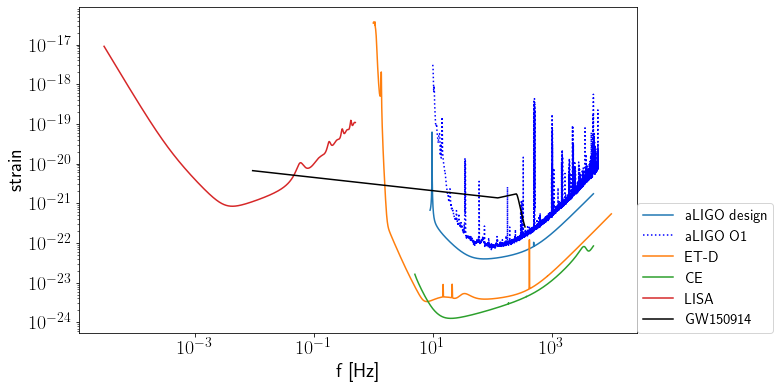

In [47]:
plt.figure(figsize=(10,6))
plt.loglog(ligo_asd[:,0],np.sqrt(ligo_asd[:,0])*ligo_asd[:,1],label='aLIGO design')
plt.loglog(ligo_O1_asd[:,0],np.sqrt(ligo_O1_asd[:,0])*ligo_O1_asd[:,1],linestyle=':',color='b', label='aLIGO O1')
plt.loglog(etd_asd[:,0],np.sqrt(etd_asd[:,0])*etd_asd[:,3],label='ET-D')
plt.loglog(ce_asd[:,0],np.sqrt(ce_asd[:,0])*ce_asd[:,1],label='CE')
plt.loglog(LISA_strain[:,0],np.sqrt(LISA_strain[:,0]*LISA_strain[:,3]),label='LISA')
plt.loglog(f_plot, np.abs(f_plot*h_plot), color='k', label='GW150914')
plt.xlabel('f [Hz]', fontsize=20)
plt.ylabel('strain', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15, loc=(1,0))

In [48]:
farr_ligo = np.logspace(np.log10(ligo_asd[0,0]),np.log10(fc),num=500)
farr_etd = np.logspace(np.log10(etd_asd[0,0]),np.log10(fc),num=500)
farr_ce = np.logspace(np.log10(ce_asd[0,0]),np.log10(fc),num=500)
farr_lisa = np.logspace(np.log10(f_start),np.log10(LISA_strain[-1,0]),num=500)

farr_ligo_O1 = np.logspace(np.log10(ligo_O1_asd[0,0]),np.log10(fc),num=500)

ligo_psd = ligo_interp(farr_ligo)**2
etd_psd = etd_interp(farr_etd)**2
ce_psd = ce_interp(farr_ce)**2
lisa_psd = lisa_interp(farr_lisa)

ligo_O1_psd = ligo_O1_interp(farr_ligo_O1)**2

In [49]:
h_GR_ligo = utilities.waveform(farr_ligo, pars_GR, cosmo_params)
h_GR_etd = utilities.waveform(farr_etd, pars_GR, cosmo_params)
h_GR_ce = utilities.waveform(farr_ce, pars_GR, cosmo_params)
h_GR_lisa = utilities.waveform(farr_lisa, pars_GR, cosmo_params)

h_GR_ligo_O1 = utilities.waveform(farr_ligo_O1, pars_GR, cosmo_params)

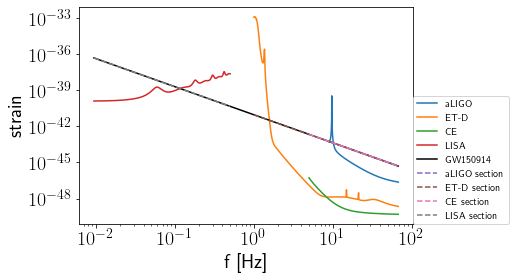

In [50]:
plt.loglog(farr_ligo,ligo_psd,label='aLIGO')
plt.loglog(farr_etd,etd_psd,label='ET-D')
plt.loglog(farr_ce,ce_psd,label='CE')
plt.loglog(farr_lisa,lisa_psd,label='LISA')
plt.loglog(farr, np.abs(h_GR)**2, color='k', label='GW150914')
plt.loglog(farr_ligo, np.abs(h_GR_ligo)**2, linestyle='--', label='aLIGO section')
plt.loglog(farr_etd, np.abs(h_GR_etd)**2, linestyle='--', label='ET-D section')
plt.loglog(farr_ce, np.abs(h_GR_ce)**2, linestyle='--', label='CE section')
plt.loglog(farr_lisa, np.abs(h_GR_lisa)**2, linestyle='--', label='LISA section')
plt.xlabel('f [Hz]', fontsize=20)
plt.ylabel('strain', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=(1,0))

In [51]:
SNR_ligo_sq = utilities.scalar_product(h_GR_ligo, h_GR_ligo, ligo_psd, farr_ligo)
SNR_ligo = np.sqrt(SNR_ligo_sq)

SNR_etd_sq = utilities.scalar_product(h_GR_etd, h_GR_etd, etd_psd, farr_etd)
SNR_etd = np.sqrt(SNR_etd_sq)

SNR_ce_sq = utilities.scalar_product(h_GR_ce, h_GR_ce, ce_psd, farr_ce)
SNR_ce = np.sqrt(SNR_ce_sq)

SNR_lisa_sq = utilities.scalar_product(h_GR_lisa, h_GR_lisa, lisa_psd, farr_lisa)
SNR_lisa = np.sqrt(SNR_lisa_sq)

SNR_ligo_O1_sq = utilities.scalar_product(h_GR_ligo_O1, h_GR_ligo_O1, ligo_O1_psd, farr_ligo_O1)
SNR_ligo_O1 = np.sqrt(SNR_ligo_O1_sq)

print('LIGO O1 SNR')
print(SNR_ligo_O1)
print('designed LIGO SNR')
print(SNR_ligo)
print('ET-D SNR')
print(SNR_etd)
print('CE SNR')
print(SNR_ce)
print('LISA SNR')
print(SNR_lisa)

LIGO O1 SNR
20.768342719866407
designed LIGO SNR
65.53220995174956
ET-D SNR
1332.9085277779873
CE SNR
3161.2427556985326
LISA SNR
8.291954120719748


In [52]:
# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: utilities.waveform(farr_ligo, [lnMz_func, np.log(eta), np.log(zem), tc, psic], cosmo_params)
dh_dlnMz_ligo = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: utilities.waveform(farr_ligo, [np.log(Ms), lneta_func, np.log(zem), tc, psic], cosmo_params)
dh_dlneta_ligo = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: utilities.waveform(farr_ligo, [np.log(Ms), np.log(eta), lnz_func, tc, psic], cosmo_params)
dh_dlnz_ligo = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)
# dh_dlnDl_func = lambda lnDl_func: utilities.waveform(farr_ligo, [np.log(eta), np.log(Ms), np.log(zem), tc, psic, lnDl_func], cosmo_params, which_wf='GR')
# dh_dlnDl_ligo = derivative(dh_dlnDl_func, np.log(Dl), dx=np.log(Dl)*1.e-3)

dh_dtc_func = lambda tc_func: utilities.waveform(farr_ligo, [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic], cosmo_params)
dh_dtc_ligo = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: utilities.waveform(farr_ligo, [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func], cosmo_params)
dh_dpsic_ligo = derivative(dh_dpsic_func, psic, dx=1.e-3)


In [53]:
# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: utilities.waveform(farr_lisa, [lnMz_func, np.log(eta), np.log(zem), tc, psic], cosmo_params)
dh_dlnMz_lisa = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: utilities.waveform(farr_lisa, [np.log(Ms), lneta_func, np.log(zem), tc, psic], cosmo_params)
dh_dlneta_lisa = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: utilities.waveform(farr_lisa, [np.log(Ms), np.log(eta), lnz_func, tc, psic], cosmo_params)
dh_dlnz_lisa = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)
# dh_dlnDl_func = lambda lnDl_func: utilities.waveform(farr_ligo, [np.log(eta), np.log(Ms), np.log(zem), tc, psic, lnDl_func], cosmo_params, which_wf='GR')
# dh_dlnDl_ligo = derivative(dh_dlnDl_func, np.log(Dl), dx=np.log(Dl)*1.e-3)

dh_dtc_func = lambda tc_func: utilities.waveform(farr_lisa, [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic], cosmo_params)
dh_dtc_lisa = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: utilities.waveform(farr_lisa, [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func], cosmo_params)
dh_dpsic_lisa = derivative(dh_dpsic_func, psic, dx=1.e-3)


Text(0, 0.5, 'Derivatives')

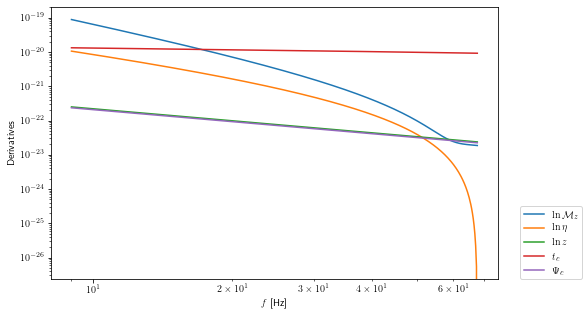

In [54]:
plt.figure(figsize=(8,5))
plt.loglog(farr_ligo, np.abs(dh_dlnMz_ligo), label=r'$\ln {\cal M}_z$')
plt.loglog(farr_ligo, np.abs(dh_dlneta_ligo), label=r'$\ln \eta$')
plt.loglog(farr_ligo, np.abs(dh_dlnz_ligo), label=r'$\ln z$')
plt.loglog(farr_ligo, np.abs(dh_dtc_ligo), label=r'$t_c$')
plt.loglog(farr_ligo, np.abs(dh_dpsic_ligo), label=r'$\Psi_c$')
plt.legend(loc=(1.05,0))
plt.xlabel(r'$f$ [Hz]')
plt.ylabel('Derivatives')

Text(0, 0.5, 'Derivatives')

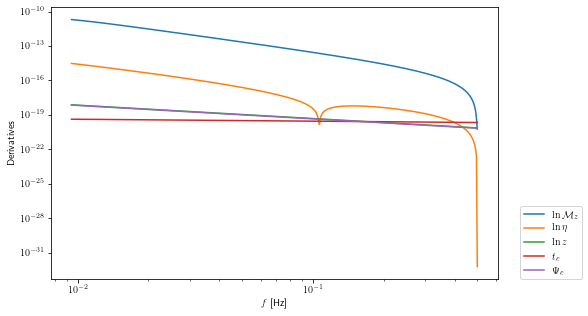

In [55]:
plt.figure(figsize=(8,5))
plt.loglog(farr_lisa, np.abs(dh_dlnMz_lisa), label=r'$\ln {\cal M}_z$')
plt.loglog(farr_lisa, np.abs(dh_dlneta_lisa), label=r'$\ln \eta$')
plt.loglog(farr_lisa, np.abs(dh_dlnz_lisa), label=r'$\ln z$')
plt.loglog(farr_lisa, np.abs(dh_dtc_lisa), label=r'$t_c$')
plt.loglog(farr_lisa, np.abs(dh_dpsic_lisa), label=r'$\Psi_c$')
plt.legend(loc=(1.05,0))
plt.xlabel(r'$f$ [Hz]')
plt.ylabel('Derivatives')

In [56]:
derivatives_ligo = [dh_dlnMz_ligo, dh_dlneta_ligo, dh_dlnz_ligo, dh_dtc_ligo, dh_dpsic_ligo]

nparams = len(derivatives_ligo)

plabels = ['lnMz','lneta','lnz','tc','psic']

Fisher_matrix_ligo = np.zeros((nparams,nparams))

for i in range(0,nparams):
    for j in range(0,nparams):
        Fisher_matrix_ligo[i,j] = utilities.scalar_product(derivatives_ligo[i], derivatives_ligo[j], ligo_psd, farr_ligo)

connum_ligo = np.linalg.cond(Fisher_matrix_ligo)
print(connum_ligo)

cov_matrix_ligo = np.linalg.inv(Fisher_matrix_ligo)

pconstraints_ligo = np.sqrt(np.diag(cov_matrix_ligo))

for i in np.arange(len(pconstraints_ligo)):
    print('error of '+plabels[i]+': %.2e'%pconstraints_ligo[i]) 
    
print(Fisher_matrix_ligo)
print(cov_matrix_ligo)

14379051.842567978
error of lnMz: 2.69e-03
error of lneta: 2.00e-02
error of lnz: 1.45e-02
error of tc: 6.02e-04
error of psic: 2.10e-01
[[ 8.05749674e+06 -1.59753460e+06 -3.79778778e+03 -1.42102748e+07
   9.55904318e+04]
 [-1.59753460e+06  3.37796693e+05 -2.23273777e-03  3.99468567e+06
  -2.41308271e+04]
 [-3.79778778e+03 -2.23273777e-03  4.83631136e+03  9.61810815e-10
  -1.33032924e-11]
 [-1.42102748e+07  3.99468567e+06  9.61810815e-10  3.21449858e+08
  -1.11368545e+06]
 [ 9.55904318e+04 -2.41308271e+04 -1.33032924e-11 -1.11368545e+06
   4.29446911e+03]]
[[7.23402677e-06 5.22235880e-05 5.68065474e-06 1.27645294e-06
  4.63447668e-04]
 [5.22235880e-05 3.99099408e-04 4.10095589e-05 1.07466203e-05
  3.86703868e-03]
 [5.68065474e-06 4.10095589e-05 2.11229993e-04 1.00235923e-06
  3.63931184e-04]
 [1.27645294e-06 1.07466203e-05 1.00235923e-06 3.62083026e-07
  1.25872310e-04]
 [4.63447668e-04 3.86703868e-03 3.63931184e-04 1.25872310e-04
  4.42885569e-02]]


In [57]:
def Fisher_det(farr, pars, psd, cosmo_params, which_wf='GR', MG_flag=False, width=0):
    
    if which_wf=='GR':
        waveform = utilities.waveform
    elif which_wf=='EFT':
        waveform = utilities.waveform_delta(cT_type='EFT').h_Delta_exact
    elif which_wf=='step':
        waveform = utilities.waveform_delta(cT_type='step', width=width).h_Delta_exact
    
    hf = waveform(farr, pars, cosmo_params)

    dh_dlnMz_func = lambda lnMz_func: waveform(farr, [lnMz_func, pars[1], pars[2], pars[3], pars[4], pars[5], pars[6]], cosmo_params)
    dh_dlnMz = derivative(dh_dlnMz_func, pars[1], dx=pars[1]*1.e-8)

    # numerical derivatives w.r.t. lneta
    dh_dlneta_func = lambda lneta_func: waveform(farr, [pars[0], lneta_func, pars[2], pars[3], pars[4], pars[5], pars[6]], cosmo_params)
    dh_dlneta = derivative(dh_dlneta_func, pars[0], dx=pars[0]*1.e-4)

    # numerical derivatives w.r.t. lnz
    dh_dlnz_func = lambda lnz_func: waveform(farr, [pars[0], pars[1], lnz_func, pars[3], pars[4], pars[5], pars[6]], cosmo_params)
    dh_dlnz = derivative(dh_dlnz_func, pars[2], dx=np.log(zem)*1.e-6)
#     dh_dlnDl_func = lambda lnDl_func: utilities.waveform(farr_ligo, [pars[0], pars[1], pars[2], pars[3], pars[4], lnDl_func], cosmo_params, which_wf)
#     dh_dlnDl = derivative(dh_dlnDl_func, pars[5], dx=np.log(Dl)*1.e-3)

    dh_dtc_func = lambda tc_func: waveform(farr, [pars[0], pars[1], pars[2], tc_func, pars[4], pars[5], pars[6]], cosmo_params)
    dh_dtc = derivative(dh_dtc_func, pars[3], dx=1.e-3)

    # numerical derivatives w.r.t. psic
    dh_dpsic_func = lambda psic_func: waveform(farr, [pars[0], pars[1], pars[2], pars[3], psic_func, pars[5], pars[6]], cosmo_params)
    dh_dpsic = derivative(dh_dpsic_func, pars[4], dx=1.e-3)

    dh_dc0_func = lambda c0_func: waveform(farr, [pars[0], pars[1], pars[2], pars[3], pars[4], c0_func, pars[6]], cosmo_params)
    dh_dc0 = derivative(dh_dc0_func, pars[5], dx=1.e-6)

    if MG_flag==True:
        derivatives = [dh_dlnMz, dh_dlneta, dh_dlnz, dh_dtc, dh_dpsic, dh_dc0]
    else:
        derivatives = [dh_dlnMz, dh_dlneta, dh_dlnz, dh_dtc, dh_dpsic]

    nparams = len(derivatives)

    plabels = ['lnMz','lneta','lnz','tc','psic', 'c0']

    Fisher_matrix = np.zeros((nparams,nparams))

    for i in range(0,nparams):
        for j in range(0,nparams):
            Fisher_matrix[i,j] = utilities.scalar_product(derivatives[i], derivatives[j], psd, farr)

    connum = np.linalg.cond(Fisher_matrix)
    print(connum)
    cov_matrix = np.linalg.inv(Fisher_matrix)

    pconstraints = np.sqrt(np.diag(cov_matrix))
#     print(Fisher_matrix)
    return pconstraints

In [58]:
pconstraints_ligo_O1 = Fisher_det(farr_ligo_O1, pars_GR, ligo_O1_psd, cosmo_params, which_wf='GR')
print('LIGO O1')
print(pconstraints_ligo_O1)

11097301.221208379
LIGO O1
[6.78087267e-05 2.37593594e-03 4.53800698e-02 7.35147695e-04
 2.23926509e-01]


In [59]:
pconstraints_ligo = Fisher_det(farr_ligo, pars_GR, ligo_psd, cosmo_params, which_wf='GR')
print('LIGO design')
print(pconstraints_ligo)

48281372.893245
LIGO design
[6.91078031e-06 3.21442117e-04 1.43875824e-02 1.75138360e-04
 4.79236727e-02]


In [60]:
pconstraints_etd = Fisher_det(farr_etd, pars_GR, etd_psd, cosmo_params, which_wf='GR')
print('ET-D')
print(pconstraints_etd)

1302784402.4025488
ET-D
[3.30320065e-08 3.07914106e-06 7.07609242e-04 7.74590893e-06
 1.18517322e-03]


In [61]:
pconstraints_ce = Fisher_det(farr_ce, pars_GR, ce_psd, cosmo_params, which_wf='GR')
print('CE')
print(pconstraints_ce)

285587578.171933
CE
[3.94302964e-08 2.50018971e-06 2.98404900e-04 3.70339427e-06
 6.65368448e-04]


In [62]:
pconstraints_lisa = Fisher_det(farr_lisa, pars_GR, lisa_psd, cosmo_params, which_wf='GR')
print('LISA')
print(pconstraints_lisa)

192378058070245.84
LISA
[1.23720812e-07 5.66779623e-05 1.13939438e-01 1.69502378e+00
 2.18568579e-01]


In [63]:
derivatives_lisa = [dh_dlnMz_lisa, dh_dlneta_lisa, dh_dlnz_lisa, dh_dtc_lisa, dh_dpsic_lisa]

nparams = len(derivatives_lisa)

plabels = ['lnMz','lneta','lnz','tc','psic']

Fisher_matrix_lisa = np.zeros((nparams,nparams))

for i in range(0,nparams):
    for j in range(0,nparams):
        Fisher_matrix_lisa[i,j] = utilities.scalar_product(derivatives_lisa[i], derivatives_lisa[j], lisa_psd, farr_lisa)

connum_lisa = np.linalg.cond(Fisher_matrix_lisa)
print(connum_lisa)

cov_matrix_lisa = np.linalg.inv(Fisher_matrix_lisa)

pconstraints_lisa = np.sqrt(np.diag(cov_matrix_lisa))

for i in np.arange(len(pconstraints_lisa)):
    print('error of '+plabels[i]+': %.2e'%pconstraints_lisa[i]) 
    
print(Fisher_matrix_lisa)
print(cov_matrix_lisa)

1.573898524440248e+17
error of lnMz: 4.07e-07
error of lneta: 2.73e-03
error of lnz: 1.14e-01
error of tc: 2.46e+00
error of psic: 6.84e-01
[[ 2.47118222e+16  3.56534201e+12 -7.93502858e+01 -1.01147551e+08
   1.19353143e+09]
 [ 3.56534201e+12  5.14603305e+08 -1.22849315e+01 -1.44117956e+04
   1.71308432e+05]
 [-7.93502858e+01 -1.22849315e+01  7.74316307e+01 -4.64998881e-13
  -1.59197015e-13]
 [-1.01147551e+08 -1.44117956e+04 -4.64998881e-13  1.13864741e+00
  -7.37183650e+00]
 [ 1.19353143e+09  1.71308432e+05 -1.59197015e-13 -7.37183650e+00
   6.87564360e+01]]
[[ 1.65873255e-13 -1.11081274e-09 -1.76066242e-10 -1.57686497e-07
  -1.28654057e-07]
 [-1.11081274e-09  7.46217259e-06  1.18277421e-06  7.91016400e-04
   7.75026766e-04]
 [-1.76066242e-10  1.18277421e-06  1.29148064e-02  1.25337278e-04
   1.22830191e-04]
 [-1.57686497e-07  7.91016400e-04  1.25337278e-04  6.03064703e+00
   1.41300161e+00]
 [-1.28654057e-07  7.75026766e-04  1.22830191e-04  1.41300161e+00
   4.68326460e-01]]


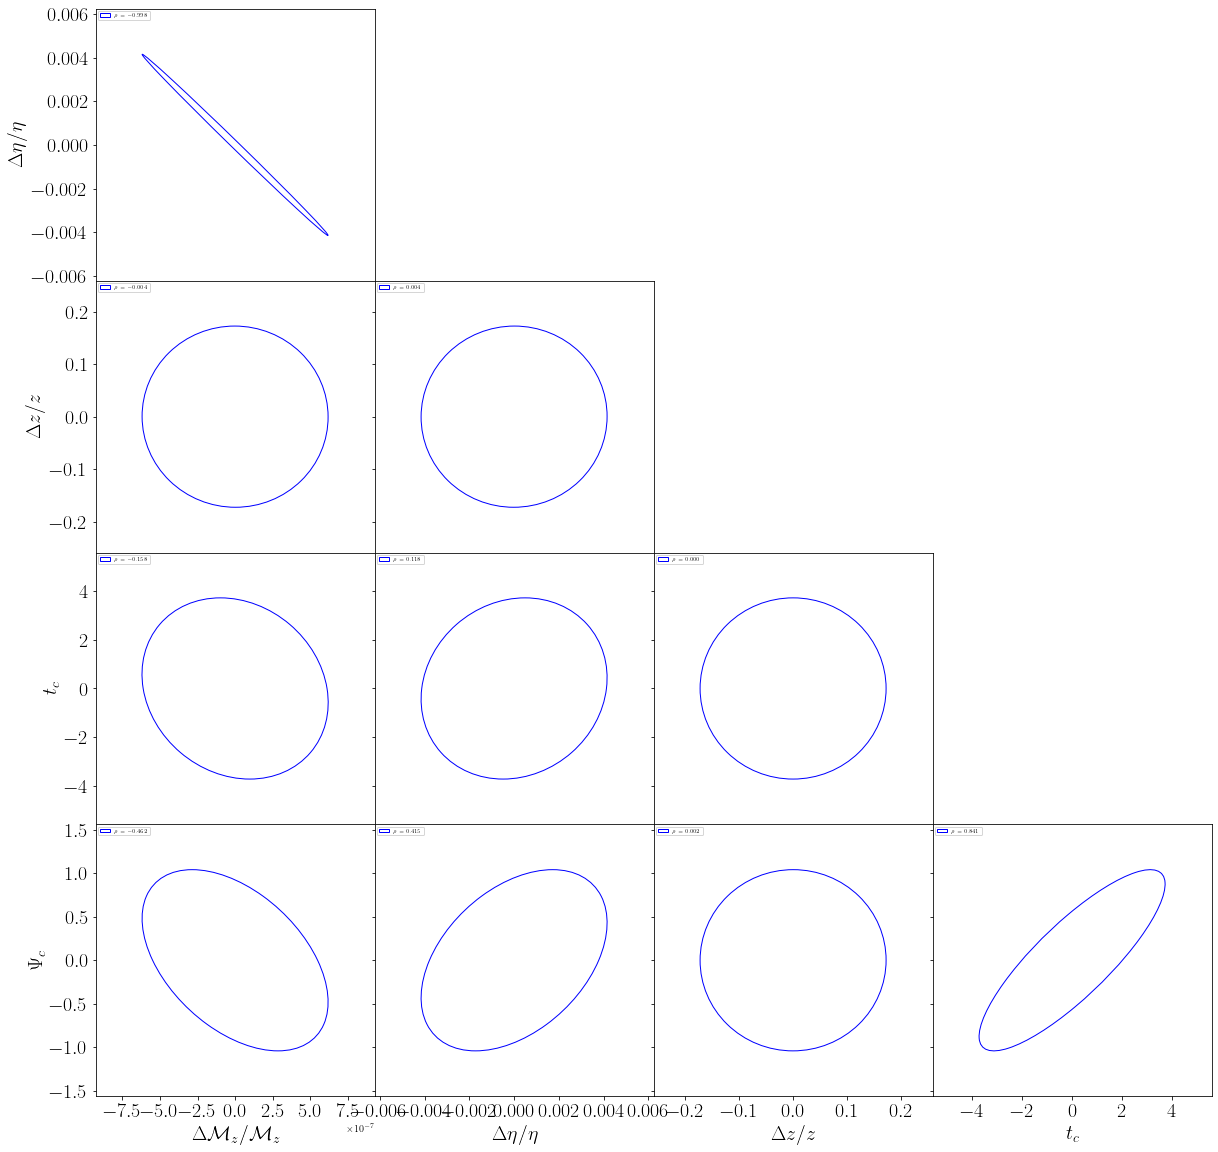

In [64]:
# Comparing with MCMC results
alpha = 1.52            #For 1 sigma

val = [0,0,0, 0,0]
label = [r'$\Delta {\cal M}_z/{\cal M}_z$', r'$\Delta \eta/\eta$', r'$\Delta z/z$',r'$t_c$',r'$\Psi_c$']
# label = [r'$\Delta {\cal M}_z/{\cal M}_z$', r'$\Delta z/z$',r'$\beta_1$',r'$\beta_2$']

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(nparams-1, nparams-1, hspace=0, wspace=0)

temp=nparams-1

for i in range(0,nparams-1):
    for j in range(1+i,nparams):

        ax = plt.subplot(gs[i+temp*(j-1)])
        
        axis_swap = False       # Default is false.

        # Fisher forecast
        a,b, theta_deg = utilities.ellipse_para(cov_matrix_lisa[i,i], cov_matrix_lisa[j,j], cov_matrix_lisa[i,j]) 
        a1sig, b1sig = alpha*a, alpha*b
        
        if (cov_matrix_lisa[j,j]>cov_matrix_lisa[i,i]):
            theta_deg +=90
            axis_swap = True
           
        rho = cov_matrix_lisa[i,j] / np.sqrt(cov_matrix_lisa[i,i]* cov_matrix_lisa[j,j])

        contour = Ellipse((val[i],val[j]), 2.*a1sig, 2.*b1sig, theta_deg, fill=False, color='b', label=r'$\rho=%.3f$'%rho)

        ax.add_patch(contour)

        if j==temp:
            ax.set_xlabel(label[i], fontsize=20)
            plt.xticks(fontsize=20)
        else:
            ax.set_xticklabels([], fontsize=20)

        if i==0:    
            ax.set_ylabel(label[j], fontsize=20)
            plt.yticks(fontsize=20)
        else:
            ax.set_yticklabels([], fontsize=20)
        
        space_fac = 1.5    #just to pad some white space around the ellipses

        ax.set_xlim(val[i]-space_fac*alpha*np.sqrt(cov_matrix_lisa[i,i]), val[i]+space_fac*alpha*np.sqrt(cov_matrix_lisa[i,i]))
        ax.set_ylim(val[j]-space_fac*alpha*np.sqrt(cov_matrix_lisa[j,j]), val[j]+space_fac*alpha*np.sqrt(cov_matrix_lisa[j,j]))
        
        ax.legend(fontsize=5, loc=2)

# EFT-induced case

In [65]:
fstar = 0.8
c0 = 0.3

cT = utilities.cT_EFT(farr, fstar, c0)

Delta = utilities.delta_EFT(farr,c0,zem, fstar)

/Users/ansonchan/GW_multiband_MG/code/utilities.py:285: RuntimeWarning: invalid value encountered in sqrt
  dd= 1 - (1+z)*ii/(np.roots(coefficients_fo(ii,c0,z)))**(1./2)


In [66]:
print(cT[-1])

0.9920591945869249


Text(0, 0.5, '$c_T$')

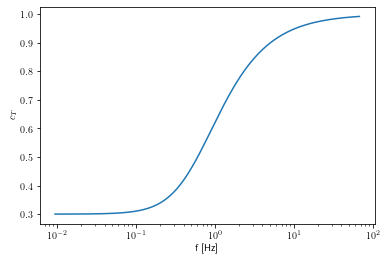

In [67]:
plt.semilogx(farr, cT)
plt.xlabel('f [Hz]')
plt.ylabel(r'$c_T$')

Text(0, 0.5, '$\\Delta$')

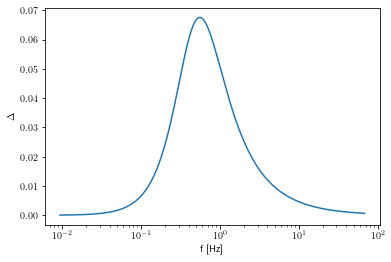

In [68]:
plt.semilogx(farr, Delta)
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Delta$')

In [69]:
pars_EFT = [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0, fstar]

In [70]:
h_Delta = utilities.waveform_delta(cT_type='EFT').h_Delta_exact(farr, pars_EFT, cosmo_params)

/Users/ansonchan/GW_multiband_MG/code/utilities.py:285: RuntimeWarning: invalid value encountered in sqrt
  dd= 1 - (1+z)*ii/(np.roots(coefficients_fo(ii,c0,z)))**(1./2)


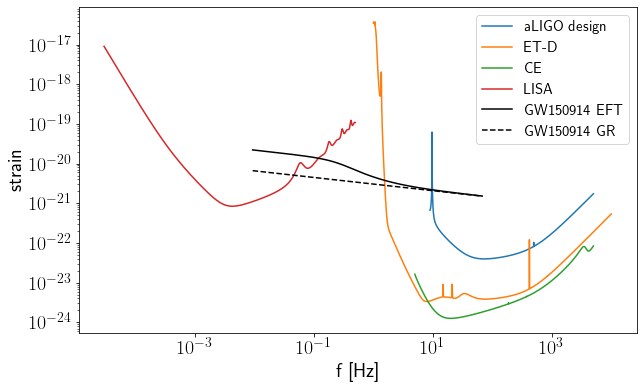

In [71]:
plt.figure(figsize=(10,6))
plt.loglog(ligo_asd[:,0],np.sqrt(ligo_asd[:,0])*ligo_asd[:,1],label='aLIGO design')
plt.loglog(etd_asd[:,0],np.sqrt(etd_asd[:,0])*etd_asd[:,3],label='ET-D')
plt.loglog(ce_asd[:,0],np.sqrt(ce_asd[:,0])*ce_asd[:,1],label='CE')
plt.loglog(LISA_strain[:,0],np.sqrt(LISA_strain[:,0]*LISA_strain[:,3]),label='LISA')
plt.loglog(farr, np.abs(farr*h_Delta), color='k', label='GW150914 EFT')
plt.loglog(farr, np.abs(farr*h_GR), color='k', label='GW150914 GR', linestyle='--')
plt.xlabel('f [Hz]', fontsize=20)
plt.ylabel('strain', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)
plt.savefig('../plots/amp_psd_EFT.pdf')

In [72]:
mask_ligo = (farr>ligo_asd[0,0]) & (farr<=ligo_asd[-1,0])
mask_etd = (farr>etd_asd[0,0]) & (farr<=etd_asd[-1,0])
mask_ce = (farr>ce_asd[0,0]) & (farr<=ce_asd[-1,0])
mask_lisa = (farr>LISA_strain[0,0]) & (farr<=LISA_strain[-1,0])

In [73]:
ligo_psd = ligo_interp(farr[mask_ligo])**2
etd_psd = etd_interp(farr[mask_etd])**2
ce_psd = ce_interp(farr[mask_ce])**2
lisa_psd = lisa_interp(farr[mask_lisa])

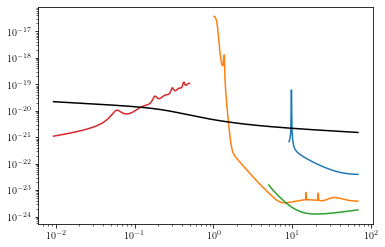

In [74]:
plt.loglog(farr[mask_ligo],np.sqrt(farr[mask_ligo]*ligo_psd),label='aLIGO design')
plt.loglog(farr[mask_etd],np.sqrt(farr[mask_etd]*etd_psd),label='ET-D')
plt.loglog(farr[mask_ce],np.sqrt(farr[mask_ce]*ce_psd),label='CE')
plt.loglog(farr[mask_lisa],np.sqrt(farr[mask_lisa]*lisa_psd),label='LISA')
plt.loglog(farr, np.abs(farr*h_Delta), color='k', label='GW150914')

In [75]:
SNR_ligo_sq = utilities.scalar_product(h_Delta[mask_ligo], h_Delta[mask_ligo], ligo_psd, farr[mask_ligo])
SNR_ligo_Delta = np.sqrt(SNR_ligo_sq)

SNR_etd_sq = utilities.scalar_product(h_Delta[mask_etd], h_Delta[mask_etd], etd_psd, farr[mask_etd])
SNR_etd_Delta = np.sqrt(SNR_etd_sq)

SNR_ce_sq = utilities.scalar_product(h_Delta[mask_ce], h_Delta[mask_ce], ce_psd, farr[mask_ce])
SNR_ce_Delta = np.sqrt(SNR_ce_sq)

SNR_lisa_sq = utilities.scalar_product(h_Delta[mask_lisa], h_Delta[mask_lisa], lisa_psd, farr[mask_lisa])
SNR_lisa_Delta = np.sqrt(SNR_lisa_sq)

print('designed LIGO SNR')
print(SNR_ligo_Delta)
print('ET-D SNR')
print(SNR_etd_Delta)
print('CE SNR')
print(SNR_ce_Delta)
print('LISA SNR')
print(SNR_lisa_Delta)

designed LIGO SNR
66.4277406904096
ET-D SNR
1388.662248081471
CE SNR
3242.4627291404604
LISA SNR
27.59121683624165


In [76]:
pars_EFT_GR = [np.log(Ms), np.log(eta), np.log(zem), tc, psic, 0.99, fstar]

In [77]:
pconstraints_ligo_EFT = Fisher_det(farr[mask_ligo], pars_EFT_GR, ligo_psd, cosmo_params, which_wf='EFT')
print('LIGO design')
print(pconstraints_ligo_EFT)

/Users/ansonchan/GW_multiband_MG/code/utilities.py:285: RuntimeWarning: invalid value encountered in sqrt
  dd= 1 - (1+z)*ii/(np.roots(coefficients_fo(ii,c0,z)))**(1./2)


48861795.889376886
LIGO design
[6.97849026e-06 3.20658490e-04 1.44240658e-02 1.75616935e-04
 4.81288613e-02]


In [78]:
pconstraints_etd_EFT = Fisher_det(farr[mask_etd], pars_EFT_GR, etd_psd, cosmo_params, which_wf='EFT')
print('ET-D')
print(pconstraints_etd_EFT)

1322049814.2807257
ET-D
[3.32675958e-08 3.10230978e-06 7.16570340e-04 7.73282761e-06
 1.18355880e-03]


In [79]:
pconstraints_ce_EFT = Fisher_det(farr[mask_ce], pars_EFT_GR, ce_psd, cosmo_params, which_wf='EFT')
print('CE')
print(pconstraints_ce_EFT)

288729642.8450761
CE
[4.02872277e-08 2.50954904e-06 3.04139593e-04 3.70248686e-06
 6.66339729e-04]


In [80]:
pconstraints_lisa_EFT = Fisher_det(farr[mask_lisa], pars_EFT_GR, lisa_psd, cosmo_params, which_wf='EFT')
print('LISA')
print(pconstraints_lisa_EFT)

178992820090194.03
LISA
[1.28888963e-07 5.64347069e-05 1.13346213e-01 1.69112723e+00
 2.28789412e-01]


In [81]:
pconstraints_MG_ligo_EFT = Fisher_det(farr[mask_ligo], pars_EFT_GR, ligo_psd, cosmo_params, which_wf='EFT', MG_flag=True)
print('LIGO design')
print(pconstraints_MG_ligo_EFT)

104691822.90181278
LIGO design
[7.02851224e-06 3.20759187e-04 1.46599267e-02 2.27792524e-04
 6.67838105e-02 3.05807438e-02]


In [82]:
pconstraints_MG_lisa_EFT = Fisher_det(farr[mask_lisa], pars_EFT_GR, lisa_psd, cosmo_params, which_wf='EFT', MG_flag=True)
print('LISA')
print(pconstraints_MG_lisa_EFT)

248635512915182.75
LISA
[1.30903452e-07 5.65324938e-05 1.13347154e-01 1.96378501e+00
 5.24173819e-01 3.11424023e-03]


# Step function

In [83]:
def smoothstep(x, x_min=0, x_max=1, N=1):
    x = np.clip((x - x_min) / (x_max - x_min), 0, 1)

    result = 0
    for n in range(0, N + 1):
         result += comb(N + n, n) * comb(2 * N + 1, N - n) * (-x) ** n

    result *= x ** (N + 1)

    return result

In [84]:
def cT_step(farr, fstar, c0, width):

    logf = np.log10(farr)

    step = smoothstep(x=logf, x_min=np.log10(fstar)-width, x_max=np.log10(fstar)+width, N=5)

    cT_val = (1-c0)*step+c0

    return cT_val

In [85]:
fstar = 0.8
c0 = 0.3

w1 = 0.5
w2 = 0.9
w3 = 1.5

In [86]:
cT_step_fo_w1 = cT_step(farr, fstar, c0, w1)
cT_step_fs_w1 = cT_step(farr*(1+zem), fstar, c0, w1)

cT_step_fo_w2 = cT_step(farr, fstar, c0, w2)
cT_step_fs_w2 = cT_step(farr*(1+zem), fstar, c0, w2)

cT_step_fo_w3 = cT_step(farr, fstar, c0, w3)
cT_step_fs_w3 = cT_step(farr*(1+zem), fstar, c0, w3)

Text(0, 0.5, '$c_T$')

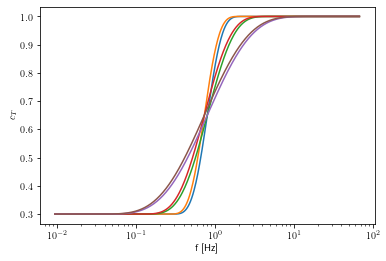

In [87]:
plt.semilogx(farr, cT_step_fo_w1)
plt.semilogx(farr, cT_step_fs_w1)
plt.semilogx(farr, cT_step_fo_w2)
plt.semilogx(farr, cT_step_fs_w2)
plt.semilogx(farr, cT_step_fo_w3)
plt.semilogx(farr, cT_step_fs_w3)
plt.xlabel('f [Hz]')
plt.ylabel(r'$c_T$')

In [88]:
Delta_step_w1 = 1-cT_step_fo_w1/cT_step_fs_w1
Delta_step_w2 = 1-cT_step_fo_w2/cT_step_fs_w2
Delta_step_w3 = 1-cT_step_fo_w3/cT_step_fs_w3

Text(0, 0.5, '$\\Delta$')

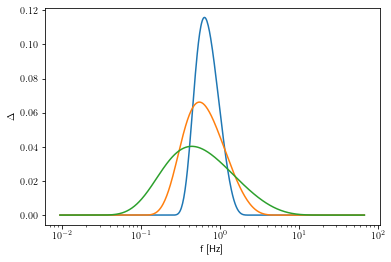

In [89]:
plt.semilogx(farr, Delta_step_w1)
plt.semilogx(farr, Delta_step_w2)
plt.semilogx(farr, Delta_step_w3)
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Delta$')

In [90]:
pars_step = [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0, fstar]

In [91]:
h_Delta_step_w1 = utilities.waveform_delta(cT_type='step', width=w1).h_Delta_exact(farr, pars_step, cosmo_params)
h_Delta_step_w2 = utilities.waveform_delta(cT_type='step', width=w2).h_Delta_exact(farr, pars_step, cosmo_params)
h_Delta_step_w3 = utilities.waveform_delta(cT_type='step', width=w3).h_Delta_exact(farr, pars_step, cosmo_params)

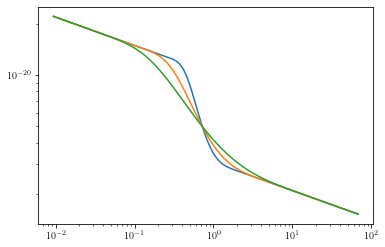

In [92]:
plt.loglog(farr, np.abs(farr*h_Delta_step_w1))
plt.loglog(farr, np.abs(farr*h_Delta_step_w2))
plt.loglog(farr, np.abs(farr*h_Delta_step_w3))
# plt.axvline(fstar)
# plt.axvline(farr[np.where(Delta_step==max(Delta_step))])

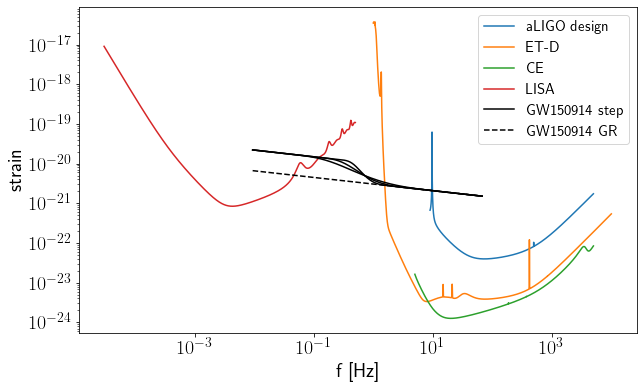

In [93]:
plt.figure(figsize=(10,6))
plt.loglog(ligo_asd[:,0],np.sqrt(ligo_asd[:,0])*ligo_asd[:,1],label='aLIGO design')
plt.loglog(etd_asd[:,0],np.sqrt(etd_asd[:,0])*etd_asd[:,3],label='ET-D')
plt.loglog(ce_asd[:,0],np.sqrt(ce_asd[:,0])*ce_asd[:,1],label='CE')
plt.loglog(LISA_strain[:,0],np.sqrt(LISA_strain[:,0]*LISA_strain[:,3]),label='LISA')
plt.loglog(farr, np.abs(farr*h_Delta_step_w1), color='k', label='GW150914 step')
plt.loglog(farr, np.abs(farr*h_Delta_step_w2), color='k')
plt.loglog(farr, np.abs(farr*h_Delta_step_w3), color='k')
plt.loglog(farr, np.abs(farr*h_GR), color='k', label='GW150914 GR', linestyle='--')
plt.xlabel('f [Hz]', fontsize=20)
plt.ylabel('strain', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)
# plt.savefig('../plots/amp_psd_step.pdf')

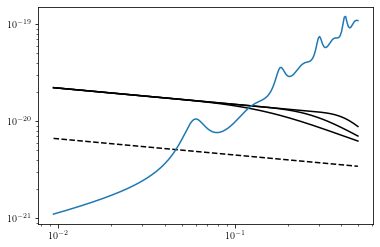

In [94]:
plt.loglog(farr[mask_lisa], np.abs(farr[mask_lisa]*h_Delta_step_w1[mask_lisa]), color='k', label='GW150914 step')
plt.loglog(farr[mask_lisa], np.abs(farr[mask_lisa]*h_Delta_step_w2[mask_lisa]), color='k')
plt.loglog(farr[mask_lisa], np.abs(farr[mask_lisa]*h_Delta_step_w3[mask_lisa]), color='k')
plt.loglog(farr[mask_lisa], np.abs(farr[mask_lisa]*h_GR[mask_lisa]), color='k', label='GW150914 GR', linestyle='--')
plt.loglog(farr[mask_lisa], np.sqrt(farr[mask_lisa]*lisa_psd))

In [95]:
SNR_ligo_sq = utilities.scalar_product(h_Delta_step_w1[mask_ligo], h_Delta_step_w1[mask_ligo], ligo_psd, farr[mask_ligo])
SNR_ligo_step = np.sqrt(SNR_ligo_sq)

SNR_etd_sq = utilities.scalar_product(h_Delta_step_w1[mask_etd], h_Delta_step_w1[mask_etd], etd_psd, farr[mask_etd])
SNR_etd_step = np.sqrt(SNR_etd_sq)

SNR_ce_sq = utilities.scalar_product(h_Delta_step_w1[mask_ce], h_Delta_step_w1[mask_ce], ce_psd, farr[mask_ce])
SNR_ce_step = np.sqrt(SNR_ce_sq)

SNR_lisa_sq = utilities.scalar_product(h_Delta_step_w1[mask_lisa], h_Delta_step_w1[mask_lisa], lisa_psd, farr[mask_lisa])
SNR_lisa_step = np.sqrt(SNR_lisa_sq)

print('designed LIGO SNR')
print(SNR_ligo_step)
print('ET-D SNR')
print(SNR_etd_step)
print('CE SNR')
print(SNR_ce_step)
print('LISA SNR')
print(SNR_lisa_step)

designed LIGO SNR
65.53080653665815
ET-D SNR
1329.9279636590938
CE SNR
3161.1727520774684
LISA SNR
27.63981095209933


In [96]:
pars_step_GR = [np.log(Ms), np.log(eta), np.log(zem), tc, psic, 1, fstar]

In [97]:
psi_delta_step_w1 = utilities.Psi_Delta_exact(farr[mask_lisa], fstar, 1, Ms, eta, zem, tc, psic, cT_type='step', width=w1)
psi_delta_step_w2 = utilities.Psi_Delta_exact(farr[mask_lisa], fstar, 1, Ms, eta, zem, tc, psic, cT_type='step', width=w2)
psi_delta_step_w3 = utilities.Psi_Delta_exact(farr[mask_lisa], fstar, 1, Ms, eta, zem, tc, psic, cT_type='step', width=w3)

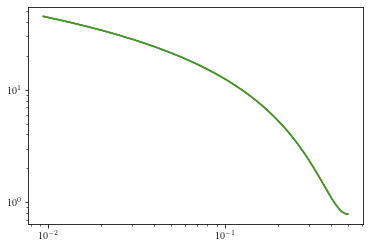

In [98]:
plt.loglog(farr[mask_lisa], np.abs(psi_delta_step_w1))
plt.loglog(farr[mask_lisa], np.abs(psi_delta_step_w2))
plt.loglog(farr[mask_lisa], np.abs(psi_delta_step_w3))

In [99]:
pconstraints_ligo_step = Fisher_det(farr[mask_ligo], pars_step_GR, ligo_psd, cosmo_params, which_wf='step')
print('LIGO design')
print('step function')
print(pconstraints_ligo_step)
print('EFT')
print(pconstraints_ligo_EFT)
print('GR')
print(pconstraints_ligo)

/Users/ansonchan/GW_multiband_MG/code/utilities.py:364: RuntimeWarning: divide by zero encountered in true_divide
  x = np.clip((x - x_min) / (x_max - x_min), 0, 1)


48188890.954121605
LIGO design
step function
[6.96024566e-06 3.22889721e-04 1.44072495e-02 1.75213976e-04
 4.79536501e-02]
EFT
[6.97849026e-06 3.20658490e-04 1.44240658e-02 1.75616935e-04
 4.81288613e-02]
GR
[6.91078031e-06 3.21442117e-04 1.43875824e-02 1.75138360e-04
 4.79236727e-02]


In [100]:
pconstraints_etd_step = Fisher_det(farr[mask_etd], pars_step_GR, etd_psd, cosmo_params, which_wf='step')
print('ET-D')
print('step function')
print(pconstraints_etd_step)
print('EFT')
print(pconstraints_etd_EFT)
print('GR')
print(pconstraints_etd)

1324561286.6839151
ET-D
step function
[3.31911369e-08 3.09825715e-06 7.15057864e-04 7.77234736e-06
 1.19518482e-03]
EFT
[3.32675958e-08 3.10230978e-06 7.16570340e-04 7.73282761e-06
 1.18355880e-03]
GR
[3.30320065e-08 3.07914106e-06 7.07609242e-04 7.74590893e-06
 1.18517322e-03]


In [101]:
pconstraints_ce_step = Fisher_det(farr[mask_ce], pars_step_GR, ce_psd, cosmo_params, which_wf='step')
print('CE')
print('step function')
print(pconstraints_ce_step)
print('EFT')
print(pconstraints_ce_EFT)
print('GR')
print(pconstraints_ce)

286211219.6713524
CE
step function
[3.95677126e-08 2.51478714e-06 3.00173895e-04 3.70807901e-06
 6.66737392e-04]
EFT
[4.02872277e-08 2.50954904e-06 3.04139593e-04 3.70248686e-06
 6.66339729e-04]
GR
[3.94302964e-08 2.50018971e-06 2.98404900e-04 3.70339427e-06
 6.65368448e-04]


In [102]:
pconstraints_lisa_step = Fisher_det(farr[mask_lisa], pars_step_GR, lisa_psd, cosmo_params, which_wf='step')
print('LISA')
print('step function')
print(pconstraints_lisa_step)
print('EFT')
print(pconstraints_lisa_EFT)
print('GR')
print(pconstraints_lisa)

177693049664596.66
LISA
step function
[1.31383991e-07 5.70759288e-05 1.15690104e-01 1.70237380e+00
 2.20004381e-01]
EFT
[1.28888963e-07 5.64347069e-05 1.13346213e-01 1.69112723e+00
 2.28789412e-01]
GR
[4.07275404e-07 2.73169775e-03 1.13643330e-01 2.45573757e+00
 6.84343817e-01]


In [107]:
print('GR')
print(Fisher_matrix_lisa)
print('step')
print(Fisher_matrix_w1)
print(' ')
print(Fisher_matrix_w2)
print(' ')
print(Fisher_matrix_w3)

GR
[[ 2.47118222e+16  3.56534201e+12 -7.93502858e+01 -1.01147551e+08
   1.19353143e+09]
 [ 3.56534201e+12  5.14603305e+08 -1.22849315e+01 -1.44117956e+04
   1.71308432e+05]
 [-7.93502858e+01 -1.22849315e+01  7.74316307e+01 -4.64998881e-13
  -1.59197015e-13]
 [-1.01147551e+08 -1.44117956e+04 -4.64998881e-13  1.13864741e+00
  -7.37183650e+00]
 [ 1.19353143e+09  1.71308432e+05 -1.59197015e-13 -7.37183650e+00
   6.87564360e+01]]
step
[[ 2.47108002e+16  3.56580403e+12 -8.10844001e+01 -1.01142913e+08
   1.19349607e+09  7.41594952e+12]
 [ 3.56580403e+12  5.14757209e+08 -1.22854078e+01 -1.44150027e+04
   1.71339051e+05  1.06490896e+09]
 [-8.10844001e+01 -1.22854078e+01  7.74317762e+01  6.89720652e-13
   2.82107958e-13  7.29617842e+01]
 [-1.01142913e+08 -1.44150027e+04  6.89720652e-13  1.13851942e+00
  -7.37180383e+00 -4.44863256e+04]
 [ 1.19349607e+09  1.71339051e+05  2.82107958e-13 -7.37180383e+00
   6.87565659e+01  4.23253300e+05]
 [ 7.41594952e+12  1.06490896e+09  7.29617842e+01 -4.44863256

In [108]:
pconstraints_MG_lisa_step_w1= Fisher_det(farr[mask_lisa], pars_step_GR, lisa_psd, cosmo_params, which_wf='step', MG_flag=True, width=w1)
print('LISA')
print('step function')
print(pconstraints_MG_lisa_step_w1)
# print('EFT')
# print(pconstraints_MG_lisa_EFT)
print('GR')
pconstraints_lisa= Fisher_det(farr[mask_lisa], pars_GR, lisa_psd, cosmo_params)
print(pconstraints_lisa)

3.6276257352991186e+18
LISA
step function
[1.31392166e-07 5.70792465e-05 1.20442230e-01 9.06704246e+01
 2.27238682e+02 3.53355049e-02]
GR
177693049664607.62
[1.31383991e-07 5.70759288e-05 1.15690104e-01 1.70237380e+00
 2.20004381e-01]


In [109]:
pconstraints_MG_lisa_step_w2= Fisher_det(farr[mask_lisa], pars_step_GR, lisa_psd, cosmo_params, which_wf='step', MG_flag=True, width=w2)
print('LISA')
print('step function')
print(pconstraints_MG_lisa_step_w2)

3.616680922881134e+16
LISA
step function
[1.31422331e-07 5.70909784e-05 1.15742638e-01 1.45997563e+01
 1.96263391e+01 3.23347783e-03]


In [110]:
pconstraints_MG_lisa_step_w3 = Fisher_det(farr[mask_lisa], pars_step_GR, lisa_psd, cosmo_params, which_wf='step', MG_flag=True, width=w3)
print('LISA')
print('step function')
print(pconstraints_MG_lisa_step_w3)

915998792626448.6
LISA
step function
[1.31804950e-07 5.71781638e-05 1.15703552e-01 3.77950799e+00
 9.50583113e-01 2.61981038e-04]


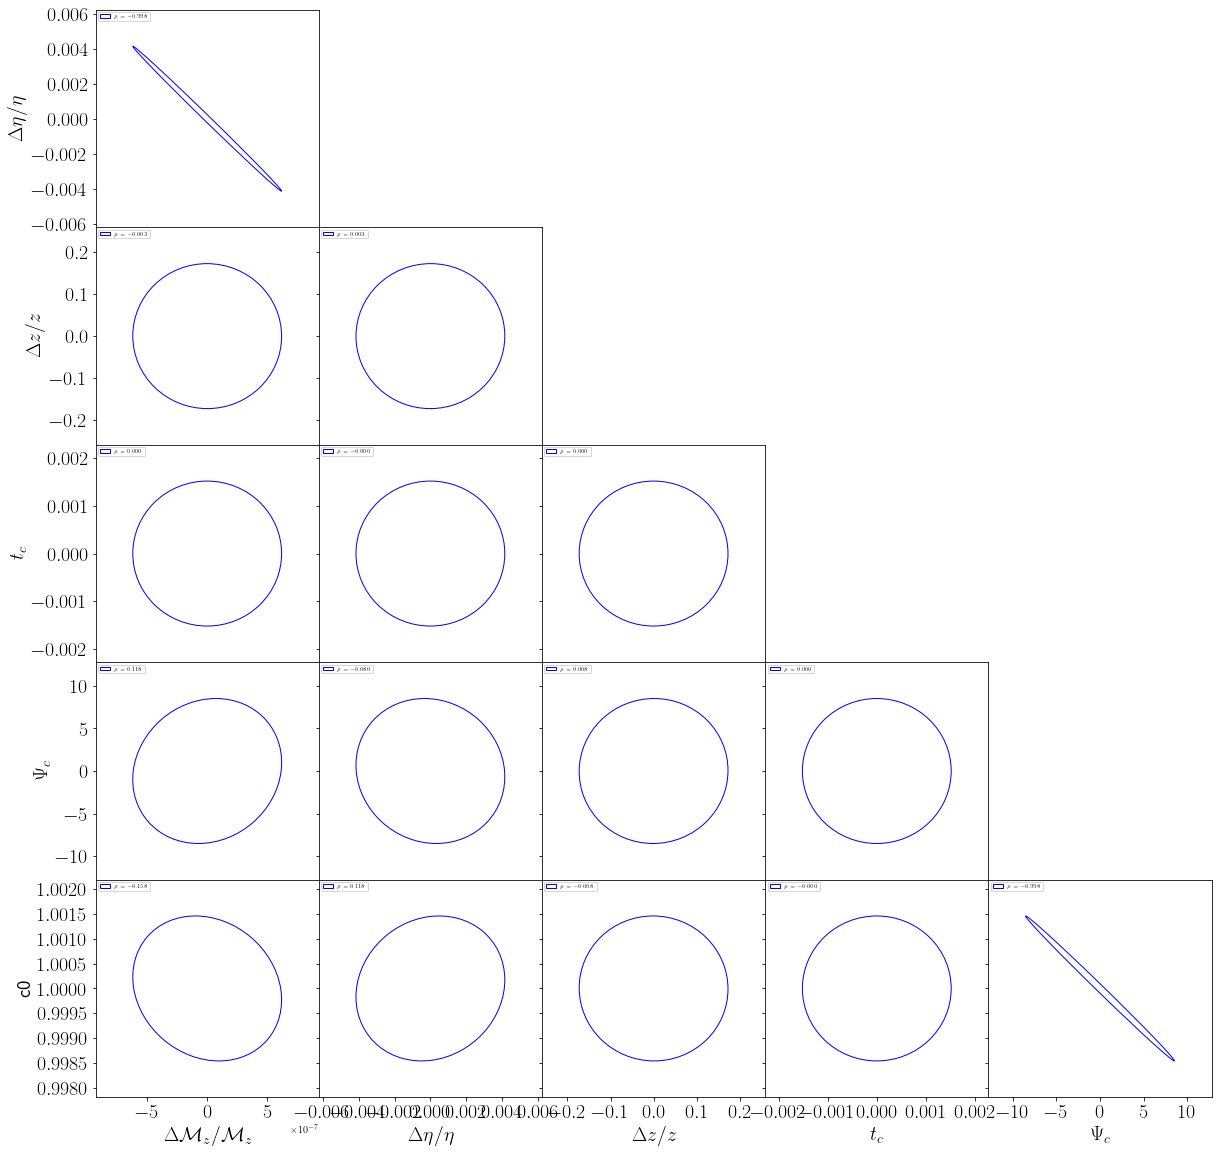

In [115]:
# Comparing with MCMC results
alpha = 1.52            #For 1 sigma

val = [0,0,0, 0,0,1]
label = [r'$\Delta {\cal M}_z/{\cal M}_z$', r'$\Delta \eta/\eta$', r'$\Delta z/z$',r'$t_c$',r'$\Psi_c$', 'c0']
# label = [r'$\Delta {\cal M}_z/{\cal M}_z$', r'$\Delta z/z$',r'$\beta_1$',r'$\beta_2$']

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(nparams-1, nparams-1, hspace=0, wspace=0)

temp=nparams-1

for i in range(0,nparams-1):
    for j in range(1+i,nparams):

        ax = plt.subplot(gs[i+temp*(j-1)])
        
        axis_swap = False       # Default is false.

        # Fisher forecast
        a,b, theta_deg = utilities.ellipse_para(cov_matrix_w1[i,i], cov_matrix_w1[j,j], cov_matrix_w1[i,j]) 
        a1sig, b1sig = alpha*a, alpha*b
        
        if (cov_matrix_w1[j,j]>cov_matrix_w1[i,i]):
            theta_deg +=90
            axis_swap = True
           
        rho = cov_matrix_w1[i,j] / np.sqrt(cov_matrix_w1[i,i]* cov_matrix_w1[j,j])

        contour = Ellipse((val[i],val[j]), 2.*a1sig, 2.*b1sig, theta_deg, fill=False, color='b', label=r'$\rho=%.3f$'%rho)

        ax.add_patch(contour)

        if j==temp:
            ax.set_xlabel(label[i], fontsize=20)
            plt.xticks(fontsize=20)
        else:
            ax.set_xticklabels([], fontsize=20)

        if i==0:    
            ax.set_ylabel(label[j], fontsize=20)
            plt.yticks(fontsize=20)
        else:
            ax.set_yticklabels([], fontsize=20)
        
        space_fac = 1.5    #just to pad some white space around the ellipses

        ax.set_xlim(val[i]-space_fac*alpha*np.sqrt(cov_matrix_w1[i,i]), val[i]+space_fac*alpha*np.sqrt(cov_matrix_w1[i,i]))
        ax.set_ylim(val[j]-space_fac*alpha*np.sqrt(cov_matrix_w1[j,j]), val[j]+space_fac*alpha*np.sqrt(cov_matrix_w1[j,j]))
        
        ax.legend(fontsize=5, loc=2)

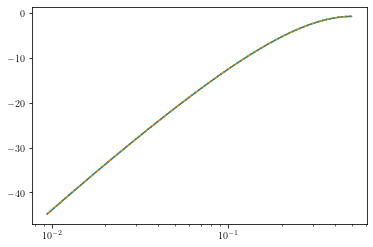

In [164]:
psi_step_w1 = utilities.Psi_Delta_exact(farr[mask_lisa], fstar, 1, Ms, eta, zem, tc, psic, cT_type='step', width=w1)
psi_step_w2 = utilities.Psi_Delta_exact(farr[mask_lisa], fstar, 1, Ms, eta, zem, tc, psic, cT_type='step', width=w2)
psi_step_w3 = utilities.Psi_Delta_exact(farr[mask_lisa], fstar, 1, Ms, eta, zem, tc, psic, cT_type='step', width=w3)

plt.semilogx(farr[mask_lisa], psi_step_w1)
plt.semilogx(farr[mask_lisa], psi_step_w1, linestyle='--')
plt.semilogx(farr[mask_lisa], psi_step_w1, linestyle=':')

In [165]:
fstar_test = 1000
c0_test = 0.9

In [166]:
waveform_test = utilities.waveform_delta(cT_type='step', width=w3).h_Delta_exact
# waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform_test(farr[mask_lisa], [lnMz_func, np.log(eta), np.log(zem), tc, psic, c0_test, fstar_test], cosmo_params)
dh_dlnMz_lisa_step_test = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform_test(farr[mask_lisa], [np.log(Ms), lneta_func, np.log(zem), tc, psic, c0_test, fstar_test], cosmo_params)
dh_dlneta_lisa_step_test = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform_test(farr[mask_lisa], [np.log(Ms), np.log(eta), lnz_func, tc, psic, c0_test, fstar_test], cosmo_params)
dh_dlnz_lisa_step_test = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)

dh_dtc_func = lambda tc_func: waveform_test(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, c0_test, fstar_test], cosmo_params)
dh_dtc_lisa_step_test = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform_test(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, c0_test, fstar_test], cosmo_params)
dh_dpsic_lisa_step_test = derivative(dh_dpsic_func, psic, dx=1.e-3)

dh_dc0_func = lambda c0_func: waveform_test(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0_func, fstar_test], cosmo_params)
dh_dc0_lisa_step_test = derivative(dh_dc0_func, c0_test, dx=1.e-6)

derivatives = [dh_dlnMz_lisa_step_test, dh_dlneta_lisa_step_test, dh_dlnz_lisa_step_test, dh_dtc_lisa_step_test, dh_dpsic_lisa_step_test, dh_dc0_lisa_step_test]
nparams = len(derivatives)
Fisher_matrix_test = np.zeros((nparams,nparams))

for i in range(0,nparams):
    for j in range(0,nparams):
        Fisher_matrix_test[i,j] = utilities.scalar_product(derivatives[i], derivatives[j], lisa_psd, farr[mask_lisa])

connum = np.linalg.cond(Fisher_matrix_test)
print(connum)
cov_matrix_test = np.linalg.inv(Fisher_matrix_test)
pconstraints_test = np.sqrt(np.diag(cov_matrix_test))
print(pconstraints_test)

2.151647552938535e+30
[3.66108531e-07 2.45563679e-03            nan 2.21079416e+00
 6.15271096e-01            nan]


/Users/ansonchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Derivatives')

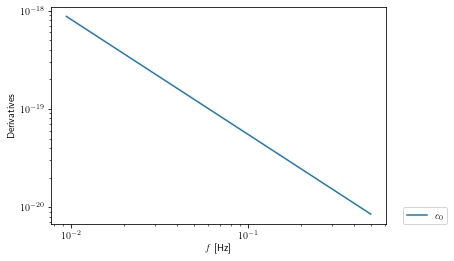

In [141]:
plt.loglog(farr[mask_lisa], np.abs(dh_dc0_lisa_step_test), label=r'$c_0$')
plt.legend(loc=(1.05,0))
plt.xlabel(r'$f$ [Hz]')
plt.ylabel('Derivatives')


In [114]:
waveform_w1 = utilities.waveform_delta(cT_type='step', width=w1).h_Delta_exact
# waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform_w1(farr[mask_lisa], [lnMz_func, np.log(eta), np.log(zem), tc, psic, 1, fstar], cosmo_params)
dh_dlnMz_lisa_step_w1 = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform_w1(farr[mask_lisa], [np.log(Ms), lneta_func, np.log(zem), tc, psic, 1, fstar], cosmo_params)
dh_dlneta_lisa_step_w1 = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform_w1(farr[mask_lisa], [np.log(Ms), np.log(eta), lnz_func, tc, psic, 1, fstar], cosmo_params)
dh_dlnz_lisa_step_w1 = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)

dh_dtc_func = lambda tc_func: waveform_w1(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, 1, fstar], cosmo_params)
dh_dtc_lisa_step_w1 = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform_w1(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, 1, fstar], cosmo_params)
dh_dpsic_lisa_step_w1 = derivative(dh_dpsic_func, psic, dx=1.e-3)

dh_dc0_func = lambda c0_func: waveform_w1(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0_func, fstar], cosmo_params)
dh_dc0_lisa_step_w1 = derivative(dh_dc0_func, 1, dx=1.e-6)

derivatives = [dh_dlnMz_lisa_step_w1, dh_dlneta_lisa_step_w1, dh_dlnz_lisa_step_w1, dh_dtc_lisa_step_w1, dh_dpsic_lisa_step_w1, dh_dc0_lisa_step_w1]
nparams = len(derivatives)
Fisher_matrix_w1 = np.zeros((nparams,nparams))

for i in range(0,nparams):
    for j in range(0,nparams):
        Fisher_matrix_w1[i,j] = utilities.scalar_product(derivatives[i], derivatives[j], lisa_psd, farr[mask_lisa])

connum = np.linalg.cond(Fisher_matrix_w1)
Fisher_matrix_w1[3,3]+=1e6
print(connum)
cov_matrix_w1 = np.linalg.inv(Fisher_matrix_w1)

1.5128493234608118e+21


In [105]:
waveform_w2 = utilities.waveform_delta(cT_type='step', width=w2).h_Delta_exact
# waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform_w2(farr[mask_lisa], [lnMz_func, np.log(eta), np.log(zem), tc, psic, 1, fstar], cosmo_params)
dh_dlnMz_lisa_step_w2 = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform_w2(farr[mask_lisa], [np.log(Ms), lneta_func, np.log(zem), tc, psic, 1, fstar], cosmo_params)
dh_dlneta_lisa_step_w2 = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform_w2(farr[mask_lisa], [np.log(Ms), np.log(eta), lnz_func, tc, psic, 1, fstar], cosmo_params)
dh_dlnz_lisa_step_w2 = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)

dh_dtc_func = lambda tc_func: waveform_w2(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, 1, fstar], cosmo_params)
dh_dtc_lisa_step_w2 = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform_w2(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, 1, fstar], cosmo_params)
dh_dpsic_lisa_step_w2 = derivative(dh_dpsic_func, psic, dx=1.e-3)

dh_dc0_func = lambda c0_func: waveform_w2(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0_func, fstar], cosmo_params)
dh_dc0_lisa_step_w2 = derivative(dh_dc0_func, 1, dx=1.e-6)

derivatives = [dh_dlnMz_lisa_step_w2, dh_dlneta_lisa_step_w2, dh_dlnz_lisa_step_w2, dh_dtc_lisa_step_w2, dh_dpsic_lisa_step_w2, dh_dc0_lisa_step_w2]
nparams = len(derivatives)
Fisher_matrix_w2 = np.zeros((nparams,nparams))

for i in range(0,nparams):
    for j in range(0,nparams):
        Fisher_matrix_w2[i,j] = utilities.scalar_product(derivatives[i], derivatives[j], lisa_psd, farr[mask_lisa])

connum = np.linalg.cond(Fisher_matrix_w2)
print(connum)
cov_matrix_w2 = np.linalg.inv(Fisher_matrix_w2)

1.5875375565447604e+19


In [106]:
waveform_w3 = utilities.waveform_delta(cT_type='step', width=w3).h_Delta_exact
# waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform_w3(farr[mask_lisa], [lnMz_func, np.log(eta), np.log(zem), tc, psic, 1, fstar], cosmo_params)
dh_dlnMz_lisa_step_w3 = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform_w3(farr[mask_lisa], [np.log(Ms), lneta_func, np.log(zem), tc, psic, 1, fstar], cosmo_params)
dh_dlneta_lisa_step_w3 = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform_w3(farr[mask_lisa], [np.log(Ms), np.log(eta), lnz_func, tc, psic, 1, fstar], cosmo_params)
dh_dlnz_lisa_step_w3 = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)

dh_dtc_func = lambda tc_func: waveform_w3(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, 1, fstar], cosmo_params)
dh_dtc_lisa_step_w3 = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform_w3(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, 1, fstar], cosmo_params)
dh_dpsic_lisa_step_w3 = derivative(dh_dpsic_func, psic, dx=1.e-3)

dh_dc0_func = lambda c0_func: waveform_w3(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0_func, fstar], cosmo_params)
dh_dc0_lisa_step_w3 = derivative(dh_dc0_func, 1, dx=1.e-6)

derivatives = [dh_dlnMz_lisa_step_w3, dh_dlneta_lisa_step_w3, dh_dlnz_lisa_step_w3, dh_dtc_lisa_step_w3, dh_dpsic_lisa_step_w3, dh_dc0_lisa_step_w3]
nparams = len(derivatives)
Fisher_matrix_w3 = np.zeros((nparams,nparams))

for i in range(0,nparams):
    for j in range(0,nparams):
        Fisher_matrix_w3[i,j] = utilities.scalar_product(derivatives[i], derivatives[j], lisa_psd, farr[mask_lisa])

connum = np.linalg.cond(Fisher_matrix_w3)
print(connum)
cov_matrix_w3 = np.linalg.inv(Fisher_matrix_w3)

4.0750070819605485e+17


(1e-22, 8.857381387928976e-15)

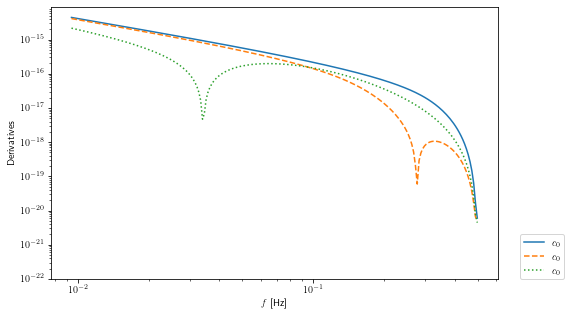

In [170]:
plt.figure(figsize=(8,5))
# plt.loglog(farr[mask_lisa], np.abs(dh_dlnMz_lisa_step_w1), label=r'$\ln {\cal M}_z$')
# plt.loglog(farr[mask_lisa], np.abs(dh_dlneta_lisa_step_w1), label=r'$\ln \eta$')
# plt.loglog(farr[mask_lisa], np.abs(dh_dlnz_lisa_step_w1), label=r'$\ln z$')
# plt.loglog(farr[mask_lisa], np.abs(dh_dtc_lisa_step_w1), label=r'$t_c$')
# plt.loglog(farr[mask_lisa], np.abs(dh_dpsic_lisa_step_w1), label=r'$\Psi_c$')
plt.loglog(farr[mask_lisa], np.abs(dh_dc0_lisa_step_w1), label=r'$c_0$')
# plt.loglog(farr[mask_lisa], np.abs(dh_dlnMz_lisa_step_w2), label=r'$\ln {\cal M}_z$', linestyle='--')
# plt.loglog(farr[mask_lisa], np.abs(dh_dlneta_lisa_step_w2), label=r'$\ln \eta$', linestyle='--')
# plt.loglog(farr[mask_lisa], np.abs(dh_dlnz_lisa_step_w2), label=r'$\ln z$', linestyle='--')
# plt.loglog(farr[mask_lisa], np.abs(dh_dtc_lisa_step_w2), label=r'$t_c$', linestyle='--')
# plt.loglog(farr[mask_lisa], np.abs(dh_dpsic_lisa_step_w2), label=r'$\Psi_c$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dc0_lisa_step_w2), label=r'$c_0$', linestyle='--')
# plt.loglog(farr[mask_lisa], np.abs(dh_dlnMz_lisa_step_w3), label=r'$\ln {\cal M}_z$', linestyle=':')
# plt.loglog(farr[mask_lisa], np.abs(dh_dlneta_lisa_step_w3), label=r'$\ln \eta$', linestyle=':')
# plt.loglog(farr[mask_lisa], np.abs(dh_dlnz_lisa_step_w3), label=r'$\ln z$', linestyle=':')
# plt.loglog(farr[mask_lisa], np.abs(dh_dtc_lisa_step_w3), label=r'$t_c$', linestyle=':')
# plt.loglog(farr[mask_lisa], np.abs(dh_dpsic_lisa_step_w3), label=r'$\Psi_c$', linestyle=':')
plt.loglog(farr[mask_lisa], np.abs(dh_dc0_lisa_step_w3), label=r'$c_0$', linestyle=':')
plt.legend(loc=(1.05,0))
plt.xlabel(r'$f$ [Hz]')
plt.ylabel('Derivatives')
plt.ylim(bottom=1e-22)

In [75]:
# waveform = utilities.waveform_delta(cT_type='EFT').h_Delta_exact
waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform(farr[mask_ligo], [lnMz_func, np.log(eta), np.log(zem), tc, psic, c0, fstar], cosmo_params)
dh_dlnMz_ligo = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform(farr[mask_ligo], [np.log(Ms), lneta_func, np.log(zem), tc, psic, c0, fstar], cosmo_params)
dh_dlneta_ligo = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform(farr[mask_ligo], [np.log(Ms), np.log(eta), lnz_func, tc, psic, c0, fstar], cosmo_params)
dh_dlnz_ligo = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)

dh_dtc_func = lambda tc_func: waveform(farr[mask_ligo], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, c0, fstar], cosmo_params)
dh_dtc_ligo = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform(farr[mask_ligo], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, c0, fstar], cosmo_params)
dh_dpsic_ligo = derivative(dh_dpsic_func, psic, dx=1.e-3)



In [76]:
waveform_EFT = utilities.waveform_delta(cT_type='EFT').h_Delta_exact
# waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform_EFT(farr[mask_ligo], [lnMz_func, np.log(eta), np.log(zem), tc, psic, c0, fstar], cosmo_params)
dh_dlnMz_ligo_EFT = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform_EFT(farr[mask_ligo], [np.log(Ms), lneta_func, np.log(zem), tc, psic, c0, fstar], cosmo_params)
dh_dlneta_ligo_EFT = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform_EFT(farr[mask_ligo], [np.log(Ms), np.log(eta), lnz_func, tc, psic, c0, fstar], cosmo_params)
dh_dlnz_ligo_EFT = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)

dh_dtc_func = lambda tc_func: waveform_EFT(farr[mask_ligo], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, c0, fstar], cosmo_params)
dh_dtc_ligo_EFT = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform_EFT(farr[mask_ligo], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, c0, fstar], cosmo_params)
dh_dpsic_ligo_EFT = derivative(dh_dpsic_func, psic, dx=1.e-3)



/Users/ansonchan/GW_multiband_MG/code/utilities.py:285: RuntimeWarning: invalid value encountered in sqrt
  dd= 1 - (1+z)*ii/(np.roots(coefficients_fo(ii,c0,z)))**(1./2)


In [77]:
waveform2 = utilities.waveform_delta(cT_type='step').h_Delta_exact
# waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform2(farr[mask_ligo], [lnMz_func, np.log(eta), np.log(zem), tc, psic, c0, fstar], cosmo_params)
dh_dlnMz_ligo_step = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform2(farr[mask_ligo], [np.log(Ms), lneta_func, np.log(zem), tc, psic, c0, fstar], cosmo_params)
dh_dlneta_ligo_step = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform2(farr[mask_ligo], [np.log(Ms), np.log(eta), lnz_func, tc, psic, c0, fstar], cosmo_params)
dh_dlnz_ligo_step = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)

dh_dtc_func = lambda tc_func: waveform2(farr[mask_ligo], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, c0, fstar], cosmo_params)
dh_dtc_ligo_step = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform2(farr[mask_ligo], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, c0, fstar], cosmo_params)
dh_dpsic_ligo_step = derivative(dh_dpsic_func, psic, dx=1.e-3)



/Users/ansonchan/GW_multiband_MG/code/utilities.py:364: RuntimeWarning: divide by zero encountered in true_divide
  x = np.clip((x - x_min) / (x_max - x_min), 0, 1)


Text(0, 0.5, 'Derivatives')

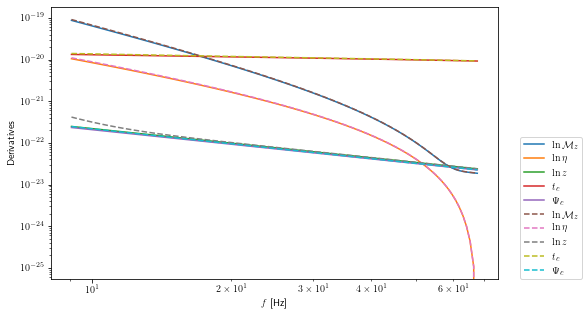

In [78]:
plt.figure(figsize=(8,5))
plt.loglog(farr[mask_ligo], np.abs(dh_dlnMz_ligo), label=r'$\ln {\cal M}_z$')
plt.loglog(farr[mask_ligo], np.abs(dh_dlneta_ligo), label=r'$\ln \eta$')
plt.loglog(farr[mask_ligo], np.abs(dh_dlnz_ligo), label=r'$\ln z$')
plt.loglog(farr[mask_ligo], np.abs(dh_dtc_ligo), label=r'$t_c$')
plt.loglog(farr[mask_ligo], np.abs(dh_dpsic_ligo), label=r'$\Psi_c$')
plt.loglog(farr[mask_ligo], np.abs(dh_dlnMz_ligo_EFT), label=r'$\ln {\cal M}_z$',linestyle='--')
plt.loglog(farr[mask_ligo], np.abs(dh_dlneta_ligo_EFT), label=r'$\ln \eta$',linestyle='--')
plt.loglog(farr[mask_ligo], np.abs(dh_dlnz_ligo_EFT), label=r'$\ln z$',linestyle='--')
plt.loglog(farr[mask_ligo], np.abs(dh_dtc_ligo_EFT), label=r'$t_c$',linestyle='--')
plt.loglog(farr[mask_ligo], np.abs(dh_dpsic_ligo_EFT), label=r'$\Psi_c$',linestyle='--')
plt.legend(loc=(1.05,0))
plt.xlabel(r'$f$ [Hz]')
plt.ylabel('Derivatives')

Text(0, 0.5, 'Derivatives')

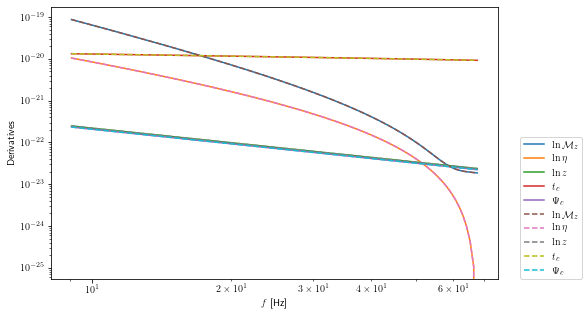

In [79]:
plt.figure(figsize=(8,5))
plt.loglog(farr[mask_ligo], np.abs(dh_dlnMz_ligo), label=r'$\ln {\cal M}_z$')
plt.loglog(farr[mask_ligo], np.abs(dh_dlneta_ligo), label=r'$\ln \eta$')
plt.loglog(farr[mask_ligo], np.abs(dh_dlnz_ligo), label=r'$\ln z$')
plt.loglog(farr[mask_ligo], np.abs(dh_dtc_ligo), label=r'$t_c$')
plt.loglog(farr[mask_ligo], np.abs(dh_dpsic_ligo), label=r'$\Psi_c$')
plt.loglog(farr[mask_ligo], np.abs(dh_dlnMz_ligo_step), label=r'$\ln {\cal M}_z$',linestyle='--')
plt.loglog(farr[mask_ligo], np.abs(dh_dlneta_ligo_step), label=r'$\ln \eta$',linestyle='--')
plt.loglog(farr[mask_ligo], np.abs(dh_dlnz_ligo_step), label=r'$\ln z$',linestyle='--')
plt.loglog(farr[mask_ligo], np.abs(dh_dtc_ligo_step), label=r'$t_c$',linestyle='--')
plt.loglog(farr[mask_ligo], np.abs(dh_dpsic_ligo_step), label=r'$\Psi_c$',linestyle='--')
plt.legend(loc=(1.05,0))
plt.xlabel(r'$f$ [Hz]')
plt.ylabel('Derivatives')

In [80]:
psi_GR = utilities.Psi_GR(farr[mask_ligo], Ms, eta, zem, tc, psic)
psi_step = utilities.Psi_Delta_exact(farr[mask_ligo], fstar, c0, Ms, eta, zem, tc, psic, cT_type='step')

/Users/ansonchan/GW_multiband_MG/code/utilities.py:364: RuntimeWarning: divide by zero encountered in true_divide
  x = np.clip((x - x_min) / (x_max - x_min), 0, 1)


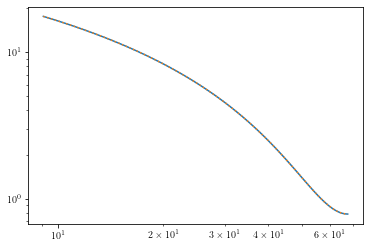

In [81]:
plt.loglog(farr[mask_ligo], np.abs(psi_GR))
plt.loglog(farr[mask_ligo], np.abs(psi_step), linestyle=':')

In [82]:
# waveform = utilities.waveform_delta(cT_type='EFT').h_Delta_exact
waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform(farr[mask_lisa], [lnMz_func, np.log(eta), np.log(zem), tc, psic, c0, fstar], cosmo_params)
dh_dlnMz_lisa = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform(farr[mask_lisa], [np.log(Ms), lneta_func, np.log(zem), tc, psic, c0, fstar], cosmo_params)
dh_dlneta_lisa = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform(farr[mask_lisa], [np.log(Ms), np.log(eta), lnz_func, tc, psic, c0, fstar], cosmo_params)
dh_dlnz_lisa = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-3)

dh_dtc_func = lambda tc_func: waveform(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, c0, fstar], cosmo_params)
dh_dtc_lisa = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, c0, fstar], cosmo_params)
dh_dpsic_lisa = derivative(dh_dpsic_func, psic, dx=1.e-3)



In [83]:
waveform_EFT = utilities.waveform_delta(cT_type='EFT').h_Delta_exact
# waveform = utilities.waveform

# numerical derivatives w.r.t. lnMz
dh_dlnMz_func = lambda lnMz_func: waveform_EFT(farr[mask_lisa], [lnMz_func, np.log(eta), np.log(zem), tc, psic, 0.99, fstar], cosmo_params)
dh_dlnMz_lisa_EFT = derivative(dh_dlnMz_func, np.log(Ms), dx=np.log(Ms)*1.e-8)

# numerical derivatives w.r.t. lneta
dh_dlneta_func = lambda lneta_func: waveform_EFT(farr[mask_lisa], [np.log(Ms), lneta_func, np.log(zem), tc, psic, 0.99, fstar], cosmo_params)
dh_dlneta_lisa_EFT = derivative(dh_dlneta_func, np.log(eta), dx=np.log(eta)*1.e-4)

# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform_EFT(farr[mask_lisa], [np.log(Ms), np.log(eta), lnz_func, tc, psic, 0.99, fstar], cosmo_params)
dh_dlnz_lisa_EFT = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-6)

dh_dtc_func = lambda tc_func: waveform_EFT(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc_func, psic, 0.99, fstar], cosmo_params)
dh_dtc_lisa_EFT = derivative(dh_dtc_func, tc, dx=1.e-3)

# numerical derivatives w.r.t. psic
dh_dpsic_func = lambda psic_func: waveform_EFT(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic_func, 0.99, fstar], cosmo_params)
dh_dpsic_lisa_EFT = derivative(dh_dpsic_func, psic, dx=1.e-3)

dh_dc0_func = lambda c0_func: waveform_EFT(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0_func, fstar], cosmo_params)
dh_dc0_lisa_EFT = derivative(dh_dc0_func, 0.99, dx=1.e-5)



/Users/ansonchan/GW_multiband_MG/code/utilities.py:285: RuntimeWarning: invalid value encountered in sqrt
  dd= 1 - (1+z)*ii/(np.roots(coefficients_fo(ii,c0,z)))**(1./2)


(1e-22, 2.3870858239333474e-10)

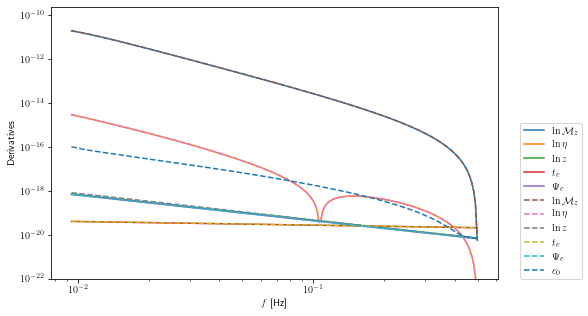

In [84]:
plt.figure(figsize=(8,5))
plt.loglog(farr[mask_lisa], np.abs(dh_dlnMz_lisa), label=r'$\ln {\cal M}_z$')
plt.loglog(farr[mask_lisa], np.abs(dh_dlneta_lisa), label=r'$\ln \eta$')
plt.loglog(farr[mask_lisa], np.abs(dh_dlnz_lisa), label=r'$\ln z$')
plt.loglog(farr[mask_lisa], np.abs(dh_dtc_lisa), label=r'$t_c$')
plt.loglog(farr[mask_lisa], np.abs(dh_dpsic_lisa), label=r'$\Psi_c$')
plt.loglog(farr[mask_lisa], np.abs(dh_dlnMz_lisa_EFT), label=r'$\ln {\cal M}_z$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dlneta_lisa_EFT), label=r'$\ln \eta$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dlnz_lisa_EFT), label=r'$\ln z$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dtc_lisa_EFT), label=r'$t_c$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dpsic_lisa_EFT), label=r'$\Psi_c$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dc0_lisa_EFT), label=r'$c_0$', linestyle='--')
plt.legend(loc=(1.05,0))
plt.xlabel(r'$f$ [Hz]')
plt.ylabel('Derivatives')
plt.ylim(bottom=1e-22)

(1e-22, 2.3620277179717986e-10)

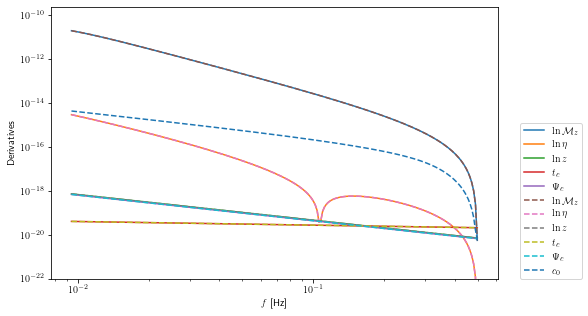

In [85]:
plt.figure(figsize=(8,5))
plt.loglog(farr[mask_lisa], np.abs(dh_dlnMz_lisa), label=r'$\ln {\cal M}_z$')
plt.loglog(farr[mask_lisa], np.abs(dh_dlneta_lisa), label=r'$\ln \eta$')
plt.loglog(farr[mask_lisa], np.abs(dh_dlnz_lisa), label=r'$\ln z$')
plt.loglog(farr[mask_lisa], np.abs(dh_dtc_lisa), label=r'$t_c$')
plt.loglog(farr[mask_lisa], np.abs(dh_dpsic_lisa), label=r'$\Psi_c$')
plt.loglog(farr[mask_lisa], np.abs(dh_dlnMz_lisa_step_w1), label=r'$\ln {\cal M}_z$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dlneta_lisa_step_w1), label=r'$\ln \eta$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dlnz_lisa_step_w1), label=r'$\ln z$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dtc_lisa_step_w1), label=r'$t_c$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dpsic_lisa_step_w1), label=r'$\Psi_c$', linestyle='--')
plt.loglog(farr[mask_lisa], np.abs(dh_dc0_lisa_step_w1), label=r'$c_0$', linestyle='--')
plt.legend(loc=(1.05,0))
plt.xlabel(r'$f$ [Hz]')
plt.ylabel('Derivatives')
plt.ylim(bottom=1e-22)

In [86]:
# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform_EFT(farr[mask_lisa], [np.log(Ms), np.log(eta), lnz_func, tc, psic, c0, fstar], cosmo_params)
dh_dlnz_lisa_EFT = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-6)
dh_dlnz_lisa_EFT2 = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*2.e-6)

/Users/ansonchan/GW_multiband_MG/code/utilities.py:285: RuntimeWarning: invalid value encountered in sqrt
  dd= 1 - (1+z)*ii/(np.roots(coefficients_fo(ii,c0,z)))**(1./2)


/Users/ansonchan/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


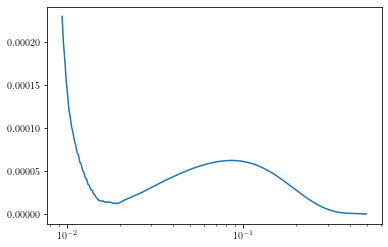

In [87]:
plt.semilogx(farr[mask_lisa], dh_dlnz_lisa_EFT/dh_dlnz_lisa_EFT2-1)

In [88]:
# numerical derivatives w.r.t. lnz
dh_dlnz_func = lambda lnz_func: waveform_w1(farr[mask_lisa], [np.log(Ms), np.log(eta), lnz_func, tc, psic, c0, fstar], cosmo_params)
dh_dlnz_lisa_step = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*1.e-6)
dh_dlnz_lisa_step2 = derivative(dh_dlnz_func, np.log(zem), dx=np.log(zem)*2.e-6)

/Users/ansonchan/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


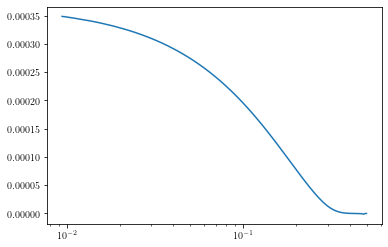

In [89]:
plt.semilogx(farr[mask_lisa], dh_dlnz_lisa_step/dh_dlnz_lisa_step2-1)

In [90]:
dh_dc0_func = lambda c0_func: waveform_EFT(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0_func, fstar], cosmo_params)
dh_dc0_lisa_EFT = derivative(dh_dc0_func, 0.99, dx=1.e-6)
dh_dc0_lisa_EFT2 = derivative(dh_dc0_func, 0.99, dx=2.e-6)

/Users/ansonchan/GW_multiband_MG/code/utilities.py:285: RuntimeWarning: invalid value encountered in sqrt
  dd= 1 - (1+z)*ii/(np.roots(coefficients_fo(ii,c0,z)))**(1./2)


/Users/ansonchan/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


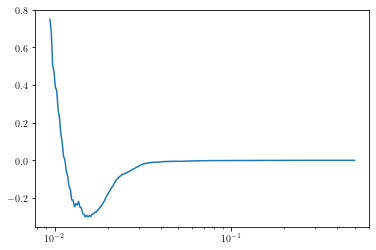

In [91]:
plt.semilogx(farr[mask_lisa], dh_dc0_lisa_EFT/dh_dc0_lisa_EFT2-1)

In [92]:
dh_dc0_func = lambda c0_func: waveform_w3(farr[mask_lisa], [np.log(Ms), np.log(eta), np.log(zem), tc, psic, c0_func, fstar], cosmo_params)
dh_dc0_lisa_step = derivative(dh_dc0_func, 1, dx=1.e-6)
dh_dc0_lisa_step2 = derivative(dh_dc0_func, 1, dx=2.e-6)

/Users/ansonchan/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


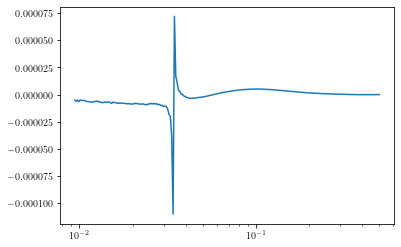

In [93]:
plt.semilogx(farr[mask_lisa], dh_dc0_lisa_step/dh_dc0_lisa_step2-1)